
### 在Jetson nano上建立和训练神经网络


#### 基础课程和提高课程
本课程分为基础课程和提高课程两部分。<br>
一.在Jetson nano上建立、训练和检验经典MNIST手写数字识别神经网络。<br>
二.使用chatGPT等AI编程工具辅助编制或修改程序。<br>


### 一.基础课程 在Jetson nano上建立、训练和检验经典MNIST手写数字识别神经网络。



<span style="color: black;">
MMNIST手写数字识别神经网络是人工智能和神经网络发展起到巨大影响、神经网络教育不可或缺的范例。<br>
考虑到读者在听取讲述或阅读本文时如果能够同时运行程序，初学者对内容的理解会很有帮助，本文以.ipynb文件格式写就，在配置了必要的运行环境的条件下，可以一边理解程序一边运行程序，以提高学习的效率和兴趣。<br>
本程序设计在NVIDIA Jetson nano上运行，除在Windows或macOS上运行此程序需要必要的环境设置和安装许多功能软件对初学者会造成困惑，花费时间外，更多的考虑是第二阶段“机器视觉”的学习必须在Jetson nano环境中进行，先行使用Jetson nano环境，能让初学者尽早熟悉Jetson nano硬件环境和软件编程。由于Jetson nano毕竟是边缘计算装置(即很小很小的计算机)，运算速度会慢一些。如果有兴趣在普通计算机上、甚至带有GPU计算机上运行此程序，
需要前面提到在常用的PC计算机上进行适当配置才能运行，这是指需要安装程序的编辑器、python编译程序和PyTorch运行环境。运行环境的安装方法在同目录<windows安装anaconda和pytorch环境.md>和<macOS安装anaconda和pytorch环境.md>文件里说明，请参考，也可以在网上自行查找环境安装方法。<br>
当前最经常使用的人工智能开发框架主要是Tensorflow和Pytorch，简单的介绍请参考同目录的《AI相关知识介绍.ipynb》，业内某些未必公允的评价认为PyTorch较为直观明晰，对初学者友好，所以这里选用了PyTorch。
当然也可以选用TensorFlow开发框架，虽两者语法规则不同，风格各异，确均运行于Python环境，算法实质并无大异，都是当今流行的主力开发平台。<br>
下边我们就开始手写体数字识别神经网络的训练程序叙述，采用边程序边叙述的方法讲解。<br>
<span >

<span style="color: brown;">
本文对程序的说明使用了两种颜色，黑色表示基本说明，初学者应该掌握的知识，绿色字体是详细说明，介绍程序语句运行细节，需要一些编程的背景知识，用于深入学习时参考。<br>
<span >

<span style="color: black;">
以下将以神经网络发展历史中经典的手写数字识别神经网络(MNIST)的训练、推理为例，介绍深度学习神经网络的训练的方法，并向没有神经网络模型训练经验的初学者简单讲解PyTorch开发平台上进行训练的程序运行流程，没有深入讨论涉及Python和Pytorch编程规则和语法解释。如果需要请自行通过其他资料进行学习。
<span >

### 1.手写体数字识别网络的训练

In [4]:

print('-------------训练开始')

-------------训练开始


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

<span style="Color:black;">
导入必要的第三方库函数：<br>
torch是PyTorch的库函数,PyTorch开发框架对python编程环境的支持是以调用torch库函数实现的。<br>
torchvision是PyTorch的一个子库，用于处理图像和视频数据。<br>
matplotlib 是一个 Python 的 2D 绘图库，它提供了大量的绘图工具，可以用于 Python 脚本、Jupyter 笔记本、Web 应用程序服务器和四个图形用户界面工具包。matplotlib 是基于 Python 的开源项目。<br>
<span>


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


<span style="Color:black;">
检查是否可以使用GPU。如果计算机装置了GPU硬件并正确安装GPU驱动程序，程序自动在GPU环境中运行，否则，在CPU硬件环境运行程序。<br>
<span>

In [8]:

# 超参数
batch_size = 64
learning_rate = 0.01
num_epochs = 5


<span style="Color:black;">
超参数是在开始学习过程之前设置控制训练速度、调整步距及输入数量大小的参数，超参数的选择会直接影响到机器学习模型的性能和行为，需要在训练过程之前由用户或算法开发者设定。
<span >
<br>
<span style="Color:green;">
设定超参数：<br>
batch_size：在机器学习和深度学习中，batch_size是指在训练过程中一次迭代所使用的训练样本数量。它是一个重要的超参数，对模型的训练效率和效果都有直接影响。<br>
learning_rate：在机器学习和深度学习中，learning rate（学习率）是一个关键的超参数，用于控制在训练过程中模型参数更新的速度。学习率的值决定了在每次迭代中参数改变的幅度。具体来说，学习率决定了在梯度下降过程中，权重更新步长的大小。<br>
num_epochs：在机器学习和深度学习中，num_epochs（即 epochs 数）是指完整地通过整个训练数据集进行一次训练的次数。理解 num_epochs 对于掌握训练过程的优化和模型的性能至关重要。<br>
<span>

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

<span style="Color:black;">
在机器学习和图像处理中，需要对图像进行预处理，它使用了 PyTorch 的 transforms 模块。这里通过 transforms.Compose 创建了一个变换序列，这些变换会按顺序应用到图像数据上。
<span >
<br>
<span style="color: green;">
具体来说，它包含了两个步骤：<br>
transforms.ToTensor()：这个变换将 PIL 图像或者 NumPy 数组转换成 PyTorch 张量。它会改变数据格式，从 H x W x C（高度 x 宽度 x 通道）变为 C x H x W（通道 x 高度 x 宽度），并且将数据类型从 uint8（取值范围是 0-255）转换为 float32（取值范围是 0.0-1.0）。这一步是数据准备的重要部分，因为 PyTorch 模型通常预期输入是张量形式。<br>
transforms.Normalize((0.5,), (0.5,))：这个变换进行数据标准化，使得输入数据的均值和标准差达到指定值。这里的参数 (0.5,) 为均值，(0.5,) 为标准差。由于传入的是单通道的灰度图像（只有一个通道），所以这里只有一个值。这种标准化有助于模型训练，因为它确保了不同的输入特征在相同的尺度上，有利于梯度下降算法更快更稳定地收敛。<br>
这种预处理流程是机器学习中常用的技术，特别是在处理图像时，可以帮助提高模型的性能和训练速度。<br>  
<span >

<span style="color: black;">
执行下一段程序前，请检查当前目录里有无两个目录data和model。分别用于存放下载的训练数据和训练完成的网络模型。在./data目录里应该有目录MNIST，这时训练数据。<br>
./model在训练前是空目录，训练后存放网络权重文件mnist_complex_net_checkpoint_epochX.pth，epochX的X表示第X次num_epochs，最大的num_epochs是最后训练的权重。权重文件可以自定义，文件名定义在训练程序块可以找到，num_epochs是超参数，在训练前决定。
<span>
</p>
<span style="color: brown;">注意：如果没有data和model目录，程序执行将会出错。
<span>

In [10]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

<img src="./images/手写数字图像.png" alt="Example Plot" style="width: 50%; height: auto;"><br>

<span style="color: black;">
这是用于训练的手写数字图像的示例。
<span >

<span style="color: black;">
MNIST（Modified National Institute of Standards and Technology）数据集是一个经典的手写数字数据集，广泛用于机器学习和深度学习的研究和教育中，通常用于计算机视觉和机器学习的入门训练和测试。它包含 28x28 像素的灰度图像，代表了数字 0 到 9。MNIST 数据集分为训练集和测试集，具体数量如下：<br>
训练集：60,000 张图像<br>
测试集：10,000 张图像<br>
每张图像都是一个单通道的灰度图像，像素值范围在 0 到 255 之间。通常，在使用时会将像素值归一化到 0 到 1 或 -1 到 1 之间。图像上的level:X是图像的标注，图像数字的正确答案，如上图所示。<br>
<span >
<span style="color: green;">
这段代码是使用 PyTorch 框架来加载和准备 MNIST 数据集的典型方式。<br>
以下是对这些代码的详细解释：<br>
<span>
<span style="color: green;">
加载数据集<br>
创建数据集对象：<br>
datasets.MNIST() 函数从 torchvision 库中被调用来加载 MNIST 数据集。<br>
root='./data' 指定了数据存储的本地路径。如果指定路径下没有数据集，则会从网络下载。<br>
train=True 和 train=False 分别表示加载的是训练集和测试集。<br>
transform=transform 应用预定义的转换（例如，转换为张量并进行标准化），这些转换在数据加载时被应用于每个图像。<br>
download=True 允许自动从互联网下载数据，如果本地没有数据的话。
创建 DataLoader<br>
配置 DataLoader：<br>
torch.utils.data.DataLoader() 用于创建一个可迭代的数据加载器，这使得在训练和测试模型时可以批量地加载数据。<br>
dataset=train_dataset 和 dataset=test_dataset 分别指定了数据来源。<br>
batch_size=batch_size 有超参数指定了每个批次加载的图像数量。这个值影响模型训练的内存消耗和速度。<br>
shuffle=True 和 shuffle=False 分别用于指定训练数据集在每个训练周期开始时是否随机打乱。对训练数据进行打乱可以帮助减少模型过拟合，而测试数据通常不需要打乱。<br>
通过设置这些参数，这段代码有效地准备了用于训练和测试的数据流，确保数据在进入模型前已经被适当处理和批量化。这样的数据处理流程是实现有效深度学习模型的关键步骤之一。<br>
<span >

In [11]:
# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<span style="color: black;">
这段代码定义了一个名为 ComplexNet 的深度学习模型，该模型基于 PyTorch 框架构建。这是一个卷积神经网络（CNN），通常用于处理图像数据。<br>
<span >
<span style="color: green;">
类定义和初始化<br>
ComplexNet 继承自 nn.Module，这是所有 PyTorch 神经网络的基类。<br>
在__init__ 方法中，定义了网络的各个层。这些层包括卷积层、池化层、全连接层（线性层）和一个 Dropout 层。<br>
(一)  层的构成<br>
1.卷积层<br>
self.conv1: 第一个卷积层，使用一个 3x3 的卷积核，输入通道为 1，输出通道为 32。使用 padding=1 以保持输入和输出的空间尺寸不变。<br>
self.conv2: 第二个卷积层，同样使用 3x3 卷积核，但输入通道增加至 32，输出通道为 64，保持相同的填充策略。<br>
2.池化层<br>
self.pool: 最大池化层，使用 2x2 的窗口对特征图进行下采样，步长为 2，这有助于减少数据的空间维度和参数数量，从而控制过拟合。<br>
3.全连接层<br>
self.fc1: 第一个全连接层，输入从卷积层通过展平操作得到的是 64*7*7 大小的特征，输出为 600。<br>
self.fc2: 第二个全连接层，进一步将特征从 600 维降至 120 维。<br>
self.fc3: 最后一个全连接层，将特征从 120 维降至 10 维，通常代表分类任务中的类别数。<br>
4.Dropout 层<br>
self.dropout: Dropout 层以 0.25 的概率丢弃部分神经元，这是防止过拟合的一种常用技术。<br>
(二)前向传播方法 forward<br>
forward 方法定义了数据如何通过这些层进行流动：<br>
数据首先通过 self.conv1 卷积层，接着是 ReLU 激活函数，然后通过池化层。<br>
经过第二个卷积层 self.conv2 和 ReLU 激活，再次经过池化层。<br>
池化后的数据需要被展平（flatten），以便作为全连接层的输入。<br>
展平后的数据通过三个全连接层（第一个经过 ReLU 激活和 Dropout，第二个仅经过 ReLU 激活），最后通过 self.fc3 输出最终结果。<br>
这样的网络结构适合进行图像分类任务，能够自动从原始像素中学习到有用的特征，最终进行分类判断。<br>
<span >

In [12]:
#实例化网络并移动到设备上：
#创建了ComplexNet的一个实例，并将其移动到了之前检测到的设备上（GPU或CPU）。
model = ComplexNet().to(device)
print('model建立')

model建立


 <span style="color: black;">   
创建了ComplexNet的一个实例，并将其移动到了之前检测到的设备上（GPU或CPU）。
<span >

In [13]:
# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

<span style="color: black;">
这段代码定义了用于训练神经网络的两个关键组件：损失函数和优化器，是 PyTorch 框架中常见的设置。<br>
<span >
<span style="color: green;">
损失函数：<br>
criterion = nn.CrossEntropyLoss()：
nn.CrossEntropyLoss() 是 PyTorch 中用于分类问题的交叉熵损失函数。<br>
这个函数结合了 nn.LogSoftmax() 和 nn.NLLLoss()（负对数似然损失）在一个单一的类中。它非常适合用于多类分类问题，其中类别是互斥的。<br>
这个损失函数期望模型的输出是原始的、未经 softmax 处理的分数（也称为 logits），并且标签应该是每个样本的类别索引。<br>
优化器：<br>
optimizer = optim.SGD(model.parameters(), lr=learning_rate) optim.SGD 是随机梯度下降（Stochastic Gradient Descent）的实现，是最基本的优化算法之一。<br>
model.parameters() 提供了模型中所有可训练参数的引用，这些参数将被优化器更新。<br>
lr=learning_rate 设定了学习率，这是控制参数更新步长的关键超参数。学习率的大小直接影响到训练过程中模型参数更新的速度和质量。<br>
这两个组件共同工作，使得在模型训练过程中，可以根据损失函数计算出的损失，通过优化器调整模型参数，以期望模型性能不断提升，损失值逐渐减小。在实际训练循环中，每个批次的数据会被用来计算损失，然后通过优化器更新模型权重。<br>
<span >


  
<span style="color: black;">
这段代码同时还涉及使用 Python 的 matplotlib 库来实时更新和显示训练过程中的损失和准确率图表。这是数据科学和机器学习中常用的做法，可以帮助开发者直观地了解模型的训练进展和性能。<br>
<span >
<span style="color: green;">
下面是对代码中每部分的具体解释：

实时交互模式
plt.ion()：
plt.ion() 开启 matplotlib 的交互模式。在这个模式下，plt.show() 命令不会阻塞代码的执行，允许图表在显示的同时继续运行更新。
这对于实时更新图表（如在训练过程中动态显示损失和准确率变化）非常有用。
初始化图表
损失图表 (fig_loss, ax_loss)：

fig_loss, ax_loss = plt.subplots() 创建一个新的图表和坐标轴用于绘制损失值。
fig_loss 是图表对象，可以用来对图表进行全局设置，如图表大小、标题等。
ax_loss 是对应的坐标轴对象，用来具体绘制和设置图表中的元素，如线条样式、坐标轴标签、图例等。
准确率图表 (fig_acc, ax_acc)：

fig_acc, ax_acc = plt.subplots() 创建另一个图表和坐标轴用于绘制准确率。
这允许损失和准确率分别在不同的窗口中实时更新，使得两者的变化趋势可以分别观察，避免在单一图表中信息过载。
使用这种方式，你可以在模型训练的每个周期（epoch）或每个批次（batch）结束后更新这些图表，展示最新的训练统计信息。这对于调试模型和调整训练参数非常有帮助，因为你可以即时看到修改参数对模型性能的影响 
<span > 

In [14]:
# 训练和评估
train_losses = []
train_accuracies = []

<span style="color: black;">
这里初始化了两个列表：train_losses 和 train_accuracies，用于存储在模型训练过程中每个迭代（通常是每个批次或每个周期）的损失和准确率。这样做可以跟踪和可视化训练过程中的性能变化，对于理解和调整模型非常重要。
<span >

Epoch 1, Loss: 1.4033, Accuracy:0.5973
Epoch 2, Loss: 0.2601, Accuracy:0.9219
Epoch 3, Loss: 0.1520, Accuracy:0.9537
Epoch 4, Loss: 0.1104, Accuracy:0.9666
Epoch 5, Loss: 0.0888, Accuracy:0.9729
-----------训练结束


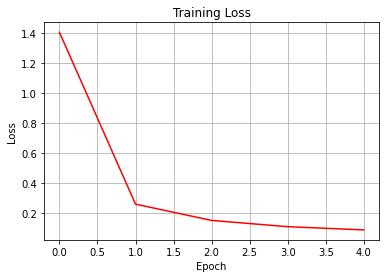

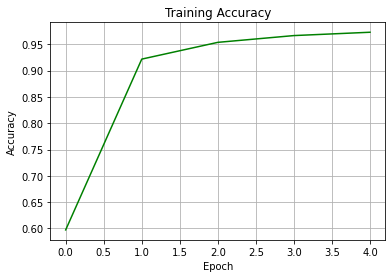

In [15]:
plt.ion()
# 初始化两个图表
'''
fig_loss, ax_loss = plt.subplots()
fig_acc, ax_acc = plt.subplots()
'''
fig_loss, ax_loss = plt.subplots()
fig_acc, ax_acc = plt.subplots()
with open('./model/training_log.txt', 'w') as f:
    #num_epochs = 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        #------------------------------------------
            _,predicted = torch.max(outputs.data,1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
        #------------------------------------------

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions/total_predictions
            # 保存checkpoint
        checkpoint = {
            #'name': 'VAIC-MNISTComplexNet',
            #'maker': 'Lichengtong ',
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss / len(train_loader)
        }
        torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth')
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy:{epoch_accuracy:.4f}')
        f.write(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}\n')
        #更新图表并保存训练结果：
        #在每个epoch结束后，更新图表以显示最新的损失和准确率，并在训练结束后保存图表为图片文件。
        ax_loss.clear()
        ax_loss.plot(train_losses, 'r-', label='Loss')
        ax_loss.set_title('Training Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        ax_loss.grid(True)
        fig_loss.canvas.draw()
        ax_acc.clear()
        ax_acc.plot(train_accuracies, 'g-', label='Accuracy')
        ax_acc.set_title('Training Accuracy')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.grid(True)        
        fig_acc.canvas.draw()

        
        '''
        #更新图表并保存训练结果：
        #在每个epoch结束后，更新图表以显示最新的损失和准确率，并在训练结束后保存图表为图片文件。
        ax_loss.clear()
        ax_loss.plot(train_losses, 'r-', label='Loss')
        ax_loss.set_title('Training Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        ax_loss.grid(True)
        fig_loss.canvas.draw()
        ax_acc.clear()
        ax_acc.plot(train_accuracies, 'g-', label='Accuracy')
        ax_acc.set_title('Training Accuracy')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.grid(True)        
        fig_acc.canvas.draw()
        '''
print('-----------训练结束')


<span style="color: black;">
这段代码是一个训练循环，神经网络在此进行有监督学习，图像数据不断从网络输入端送入，经过前向转播，到输出端与标注进行比较，如有差别，将此差别进行反向转播对网络权重进行调整，以减少判断误差(损失：Loss)，增加识别准确率(精度：Accuracy)。网络的权重、正向和反向转播请参考“神经网络和AI背景知识简介.ipynb”<br>
<span >
<span style="color: green;">
我们详细解释这个脚本的每个部分和功能：<br>
文件记录<br>
使用 with open('./model/training_log.txt', 'w') as f 来打开一个文件，用于写入训练过程中的日志。这种方式确保了文件在代码块执行完毕后会被正确关闭。<br>
训练过程<br>
num_epochs = 5 设定了训练周期数为5，超参数在训练前是可以改动的。<br>
for epoch in range(num_epochs): 开始一个循环，每次循环代表一个训练周期。<br>
在每个周期中：
running_loss = 0.0 初始化累计的损失。<br>
correct_predictions = 0 和 total_predictions = 0 初始化用于计算准确率的计数器。<br>
对每个批次的处理：<br>
for i, data in enumerate(train_loader, 0): 从 train_loader 中迭代获取数据批次。<br>
inputs, labels = data[0].to(device), data[1].to(device) 将输入和标签转移到计算设备（如GPU）上。<br>
optimizer.zero_grad() 清除之前的梯度信息。<br>
outputs = model(inputs) 获取模型对当前批次的输出。<br>
loss = criterion(outputs, labels) 计算损失。<br>
loss.backward() 进行反向传播。<br>
optimizer.step() 根据梯度更新模型参数。<br>
running_loss += loss.item() 累加损失以计算平均损失。<br>
_, predicted = torch.max(outputs.data, 1) 获取预测结果。<br>
total_predictions += labels.size(0) 更新总预测数。<br>
correct_predictions += (predicted == labels).sum().item() 更新正确预测数。
计算和记录结果：<br>
epoch_loss = running_loss / len(train_loader) 计算本周期平均损失。<br>
epoch_accuracy = correct_predictions / total_predictions 计算本周期准确率。<br>
torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth')
这里，torch.save() 函数用于将checkpoint字典保存到磁盘。文件路径和名称是动态生成的，使用f-string（Python 3.6+的特性）来包含epoch号。这样，每个epoch的checkpoint都会被保存为一个单独的文件，文件名中包含了epoch号，使得在将来可以轻松地找到和加载特定的checkpoint。<br>
train_losses.append(epoch_loss) 和 train_accuracies.append(epoch_accuracy) 分别记录损失和准确率。<br>
print(...) 在控制台输出当前周期的结果。<br>
<span >
<span style="color: black;">

代码完整地展示了使用 PyTorch 进行神经网络训练的基本步骤，包括数据处理、模型训练、损失计算、反向传播、参数更新、结果计算和日志记录。通过记录文件，你可以随时查看训练过程中的详细性能变化，这对于调试和改进模型非常有帮助。<br>
<span >

<span style="color: black;">
代码涉及使用 Python 的 matplotlib 库来实时更新和显示训练过程中的损失和准确率图表。这是数据科学和机器学习中常用的做法，可以帮助开发者直观地了解模型的训练进展和性能。
<span >
<span style="color: green;"><br>
下面是对代码中每部分的具体解释：<br>
实时交互模式
plt.ion()：
plt.ion() 开启 matplotlib 的交互模式。在这个模式下，plt.show() 命令不会阻塞代码的执行，允许图表在显示的同时继续运行更新。<br>
这对于实时更新图表（如在训练过程中动态显示损失和准确率变化）非常有用。<br>
初始化图表<br>
损失图表 (fig_loss, ax_loss)：<br>
fig_loss, ax_loss = plt.subplots() 创建一个新的图表和坐标轴用于绘制损失值。<br>
fig_loss 是图表对象，可以用来对图表进行全局设置，如图表大小、标题等。<br>
ax_loss 是对应的坐标轴对象，用来具体绘制和设置图表中的元素，如线条样式、坐标轴标签、图例等。<br>
准确率图表 (fig_acc, ax_acc)：<br>
fig_acc, ax_acc = plt.subplots() 创建另一个图表和坐标轴用于绘制准确率。<br>
这允许损失和准确率分别在不同的窗口中实时更新，使得两者的变化趋势可以分别观察，避免在单一图表中信息过载。<br>
使用这种方式，你可以在模型训练的每个周期（epoch）或每个批次（batch）结束后更新这些图表，展示最新的训练统计信息。这对于调试模型和调整训练参数非常有帮助，因为你可以即时看到修改参数对模型性能的影响  <br>
每个训练周期结束后动态更新训练损失和准确率的图表，并在整个训练过程结束后将这些图表保存为图片文件。<br>
这是一个非常有用的过程，因为它可以帮助可视化模型的学习进度和性能变化。下面是对代码的详细解释：<br>
更新图表
在每个训练周期的末尾，图表被更新以反映最新的训练损失和准确率。具体步骤包括：<br>
清除旧的图表内容：使用 ax_loss.clear() 和 ax_acc.clear() 来清除之前的图表内容，这是为了在图表上描绘新的数据点之前移除旧的数据点。<br>
绘制新的数据：<br>
对于损失图表：使用 ax_loss.plot(train_losses, 'r-', label='Loss') 绘制损失数据，其中 'r-' 指定了线条颜色和样式（红色实线）。<br>
对于准确率图表：使用 ax_acc.plot(train_accuracies, 'g-', label='Accuracy') 绘制准确率数据，其中 'g-' 指定了线条颜色和样式（绿色实线）。<br>
设置图表标题和坐标轴标签：
为损失图表设置标题、X轴和Y轴标签。
为准确率图表做同样的设置。
重新绘制图表：使用 fig_loss.canvas.draw() 和 fig_acc.canvas.draw() 来触发图表的重绘，使更新的数据能够显示在图表上。
保存图表为图片文件
在整个训练过程结束后，你可以使用 fig_loss.savefig('training_loss.png') 和 fig_acc.savefig('training_accuracy.png') 将这些图表保存为图片文件。这样做不仅方便将训练结果文档化，也便于后续的分析和报告。
注意，上述保存图片文件的代码行应该在所有训练周期完成后执行，通常放在训练循环外部。
通过这种方式，你可以确保每次训练的结果都得到有效的记录和可视化，这是评估和比较模型性能的重要工具。
<span >


In [16]:
plt.ioff()
plt.show()
#保存图
fig_loss.savefig('fig_loss.png')
fig_acc.savefig('fig_acc.png')

<span style="color: black;">
关闭交互模式plt.ioff()：关闭了 matplotlib 的交互模式。<br>
<span >
<span style="color: green;">
开启交互模式(plt.ion())是为了让图表可以在训练过程中实时更新而不阻塞程序运行。一旦训练结束并且不再需要实时更新，你可以关闭交互模式以准备最终展示或保存静态图像。<br>
显示图表：<br>
plt.show()：此命令用于展示当前所有活动的 matplotlib 图窗。它通常在非交互模式下使用，以在程序执行完成后展示图形界面。当交互模式关闭后，使用这个命令可以确保用户有机会查看最终的图表。<br>
保存图表为图片：<br>
fig_loss.savefig('fig_loss.png') 和 fig_acc.savefig('fig_acc.png')：这两行代码将训练损失图表和训练准确率图表分别保存为 PNG 格式的图片文件。这是一个非常有用的功能，因为它允许你将图表保存下来，以便于报告或进一步分析。<br>
fig_loss.png 和 fig_acc.png 是文件的保存路径和名称。你可以根据需要修改这些参数，以保存在不同的位置或使用不同的文件名。<br>
通过这种方式，你不仅可以在屏幕上查看训练过程中的性能变化，还可以有永久的记录，这对于后续的评估和比较是非常有帮助的。<br>
<span >

In [17]:

print('----------训练结束')

----------训练结束


### 2. 手写体数字识别模型识别功能的验证
<span style="color: black;">
读者在这里进行训练完成的模型进行识别性能的测试，可以适当地修改模型的网络结构(增加减少层数、神经元数)，训练后测试识别性能的变化等。还可以使用GPT4o、copilot等AI工具帮助程序的修改。学习AI工具的使用，能很好地提高初学者的编程能力。<br>
<span >
<span style="color: red;">
下面这段代码与训练部分网络建立完全相同，如果是训练后没有退出而立即进行验证，这部分代码可以不用再度执行,直接执行下一程序框。
<span >

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

import numpy as np

# 设置随机种子以确保结果可复现
torch.manual_seed(0)
np.random.seed(0)

# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 实例化模型
model = ComplexNet().to(device)
print('model建立')

model建立


推理错误的个数: 9 / 100


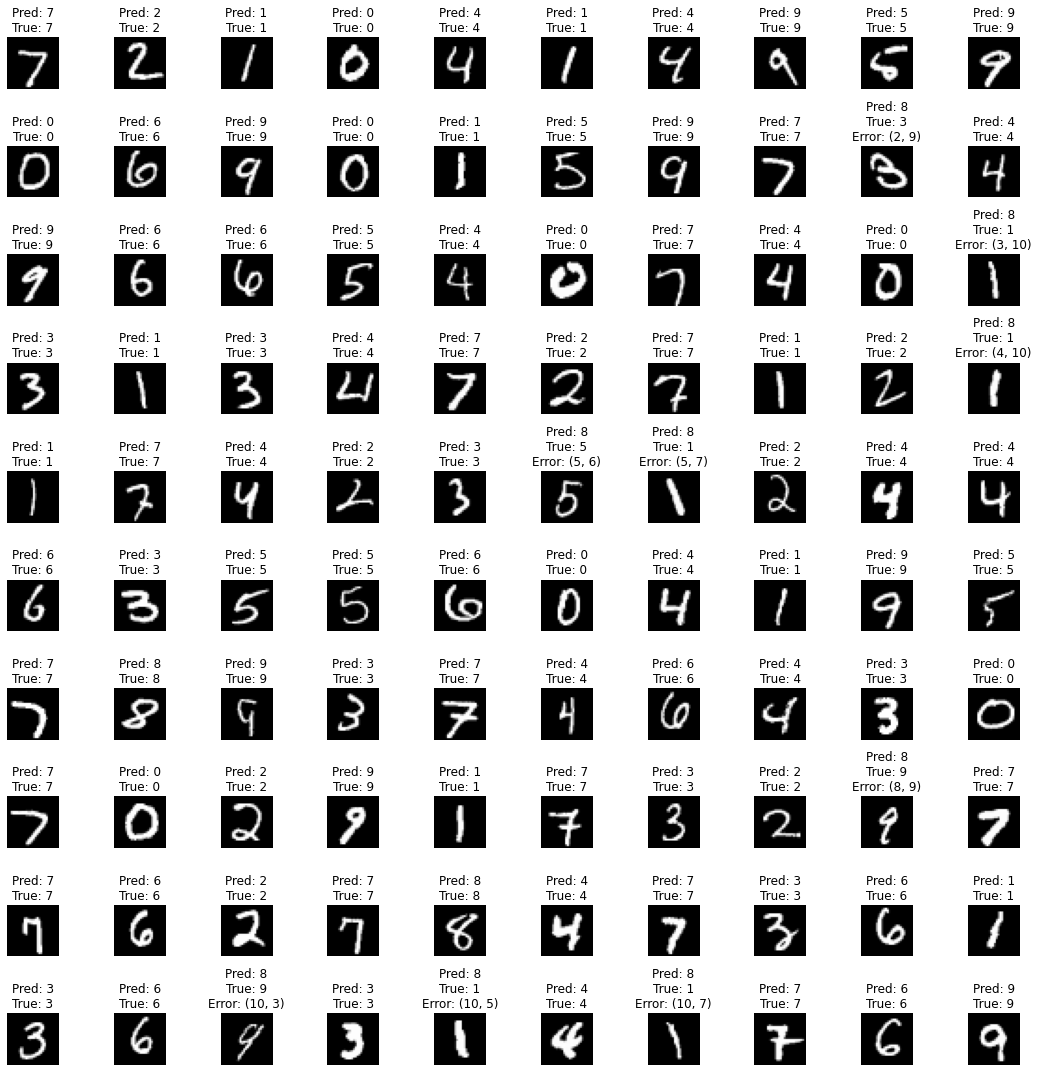

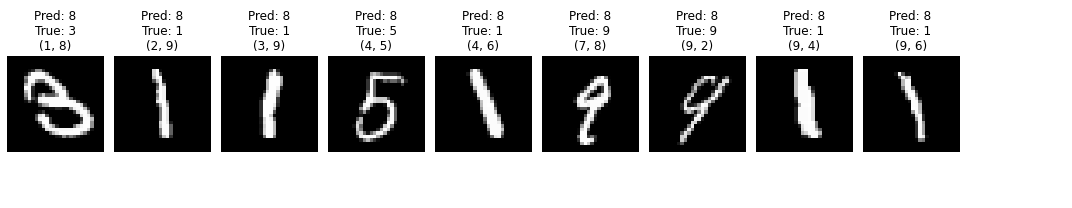

--------------验证结束


In [18]:

# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint = torch.load('./model/mnist_complex_net_checkpoint_epoch5.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载测试数据
test_size = 100
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)
# 获取一个批次的数据
data, target = next(iter(test_loader))

# 将数据输入模型进行推理
data = data.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)

# 计算推理错误的个数并记录错误的行列位置
incorrect = (pred.cpu() != target.view_as(pred)).sum().item()
incorrect_indices = (pred.cpu() != target.view_as(pred)).nonzero(as_tuple=True)[0]

print(f'推理错误的个数: {incorrect} / 100')

# 设置显示样本的网格
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()

# 显示每个样本及其预测结果
for i in range(test_size):
    axs[i].imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
    title = f'Pred: {pred[i].item()}\nTrue: {target[i].item()}'
    if i in incorrect_indices:
        row, col = divmod(i, 10)
        title += f'\nError: ({row + 1}, {col + 1})'
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# 显示推理错误的图像
if incorrect > 0:
    rows = (incorrect // 10) + (1 if incorrect % 10 != 0 else 0)
    fig_error, axs_error = plt.subplots(rows, 10, figsize=(15, 3 * rows))
    axs_error = axs_error.flatten()

    for idx, error_idx in enumerate(incorrect_indices):
        axs_error[idx].imshow(data[error_idx].cpu().numpy().squeeze(), cmap='gray')
        row, col = divmod(error_idx.item(), 10)
        axs_error[idx].set_title(f'Pred: {pred[error_idx].item()}\nTrue: {target[error_idx].item()}\n({row}, {col})')
        axs_error[idx].axis('off')

    for ax in axs_error[incorrect:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    print('--------------验证结束')


<span style="color: black;">
这里程序执行了一系列步骤来加载一个刚才我们训练的网络模型，使用它来对MNIST数据集的一个测试批次进行推理，并可视化这些测试图像及其预测结果，同时突出显示预测错误的图像。<br>
<span "><br>
<span style="color: green;">
下面是每个步骤的详细解释：<br>
加载预训练模型参数：<br>
使用torch.load加载包含模型状态字典（model_state_dict）的checkpoint文件。<br>
将加载的状态字典加载到模型中，使用model.load_state_dict(checkpoint['model_state_dict'])。<br>
将模型设置为评估模式，model.eval()，这对于某些层（如Dropout和BatchNorm）的行为很重要，这些层在训练和评估时表现不同。<br>
定义数据预处理：<br>
使用transforms.Compose定义一个预处理流程，包括将图像转换为张量（transforms.ToTensor()）和标准化（transforms.Normalize((0.1307,), (0.3081,))），这些参数是MNIST数据集的标准化参数。<br>
加载测试数据：<br>
使用datasets.MNIST加载MNIST测试数据集，指定train=False以获取测试集。<br>
使用DataLoader创建一个数据加载器，设置batch_size=test_size（这里假设您想一次性加载整个测试集的一个子集或全部，但通常batch_size会设置为较小的值以分批加载数据）。<br>
通过next(iter(test_loader))获取测试数据的一个批次（这里实际上是整个测试集或指定大小的子集）。<br>
模型推理：<br>
将数据移动到模型所在的设备（CPU或GPU），使用data = data.to(device)。<br>
使用模型进行推理，output = model(data)，得到预测结果。<br>
使用argmax函数找到预测概率最高的类别的索引，即预测结果。<br>
计算推理错误：<br>
比较预测结果和真实标签，计算错误的数量。<br>
记录预测错误的图像的索引。<br>
可视化结果：<br>
使用matplotlib创建一个10x10的网格来显示图像。<br>
遍历测试集中的每个图像，使用imshow显示图像，并设置标题以显示预测结果和真实标签。<br>
如果图像预测错误，则在标题中添加错误标记和位置。<br>
关闭坐标轴，并使用plt.tight_layout()调整子图参数，使之填充整个图像区域。<br>
显示图像。<br>

<span >

### 二.提高课程 使用chatGPT辅助修改程序


使用 ChatGPT 辅助编写 Python 程序有很多好处，尤其对编程初学者在学习新概念和提高编码能力等方面有以下一些主要的益处：

#### 1. **即时帮助和快速解决问题**
   - **实时获取解决方案**: 当你还不熟悉python语言无法编程或对程序进行修改时，无需长时间学习python的编程细节，可以立即向 ChatGPT 提问，并获得具体的解决方案或代码示例。
   - **错误调试**: ChatGPT 可以帮助分析和解释代码中的错误信息，并提供可能的修复方法，帮助你快速解决问题。

#### 2. **提高学习的效率**
   - **自动生成代码**: ChatGPT 可以根据你的需求快速生成代码片段或模板，减少重复劳动，帮助你专注于更复杂的逻辑和功能实现。
   - **简化任务**: 通过自然语言描述任务，ChatGPT 可以为你生成代码，这减少了手动编写代码的时间。

#### 3. **学习新概念和技术**
   - **即时教学**: 当你不理解某个概念或函数时，ChatGPT 可以提供详细的解释和示例代码，帮助你更好地理解 Python 的特性和库的使用方法。
   - **广泛的支持**: ChatGPT 可以帮助你了解不同的 Python 库、框架和工具的使用，帮助你快速掌握新的编程技能。

#### 4. **增强代码质量**
   - **代码优化建议**: ChatGPT 可以为你现有的代码提供优化建议，包括性能改进、简化代码逻辑和增强可读性。
   - **最佳实践**: ChatGPT 会根据常见的编程最佳实践，帮助你编写更加规范、清晰和易于维护的代码。


#### 5. **创新性支持**
   - **探索新想法**: 当你有新的编程想法时，可以与 ChatGPT 讨论并获得建议，帮助你完善和实现这些想法。
   - **跨学科应用**: 如果你在从事跨学科的项目（如结合编程和机器学习、数据科学等），ChatGPT 可以帮助你将这些领域的知识整合到代码中。

使用 ChatGPT 辅助编写 Python 程序不仅能提高开发效率，还能帮助你学习新技能、优化代码质量，并简化许多日常编程任务。ChatGPT 作为一个智能助手，可以在学习过程中为你提供全方位的支持，从代码生成、错误调试到学习和理解新概念，让人工智能编程学习过程更加顺畅、高效。

#### 例题 1.用chatGPT解释程序中没有理解的问题。<br>
例如，课程中我们并没有解释：<br>

In [ ]:
# 损失函数和优化器
criterion = nn.CrossEntropyLoss()<br>
optimizer = optim.SGD(model.parameters(), lr=learning_rate)<br>

程序段。因为会涉及到一些较高的数学知识，但如果需要了解，可以在chatGPT的输入框内输入：<br>

“请解释 criterion = nn.CrossEntropyLoss()<br>
optimizer = optim.SGD(model.parameters(), lr=learning_rate)”



chatGPT给出如下回答：

<br><br>
这两行代码在 PyTorch 中是用于设置神经网络训练过程中的损失函数和优化器。下面是对这两行代码的详细解释：

### 1. `criterion = nn.CrossEntropyLoss()`

- **`nn.CrossEntropyLoss()`** 是 PyTorch 中定义的一种损失函数，用于多分类任务。
- **损失函数的作用**: 在训练神经网络时，损失函数用来衡量模型的预测结果与真实标签之间的差距。通过最小化损失函数的值，模型参数（如权重和偏置）得以更新，从而使模型逐渐学习到更好的预测能力。
- **`CrossEntropyLoss` 的用途**: 
  - 该损失函数综合了 `nn.LogSoftmax()` 和 `nn.NLLLoss()`，因此你不需要在网络输出层手动应用 softmax 激活函数。
  - 它主要用于多分类任务，即模型需要从多个类别中选择一个最有可能的类别作为输出。
  - 它期望输入为未经过 softmax 处理的 raw logits（即模型最后一层的线性输出），并且期望标签为类别索引（不是 one-hot 编码）。

**示例**:
```python
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
```

在这个例子中，`criterion` 被定义为一个交叉熵损失函数，它将在训练过程中计算每个批次的损失。

### 2. `optimizer = optim.SGD(model.parameters(), lr=learning_rate)`

- **`optim.SGD()`** 是 PyTorch 中的一个优化器，表示随机梯度下降（Stochastic Gradient Descent）。
- **优化器的作用**: 优化器负责在每次反向传播后，根据损失函数对模型参数的梯度，更新模型的参数，以最小化损失函数。
- **`SGD` 的特点**:
  - 随机梯度下降是一种常用的优化方法，适合处理大规模数据集。
  - 它通过在每次更新时使用一个小批量（mini-batch）数据来计算梯度，逐步逼近损失函数的最小值。
  
- **`model.parameters()`**: 这个方法返回模型中所有需要学习的参数（如权重和偏置），优化器将根据这些参数的梯度来进行更新。

- **`lr=learning_rate`**: 这里的 `lr` 是学习率参数，控制每次参数更新的步长。学习率是一个非常重要的超参数，通常需要通过实验来调优。

**示例**:
```python
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
```

在这个例子中，`optimizer` 被定义为一个随机梯度下降优化器，它将在训练过程中根据梯度更新模型参数。`lr=0.01` 设置了学习率为 0.01。

### 总结

- `criterion = nn.CrossEntropyLoss()`：定义了一个用于多分类任务的交叉熵损失函数，它将用于计算模型预测和真实标签之间的损失。
- `optimizer = optim.SGD(model.parameters(), lr=learning_rate)`：定义了一个随机梯度下降优化器，该优化器将使用指定的学习率来更新模型的参数，以最小化损失函数。

这两个组件是训练神经网络时的核心部分：损失函数用于衡量模型的表现，而优化器用于根据损失来调整模型的参数。

这对学习是有很大帮助的。

#### 例题 2.用chatGPT修改程序。<br>
为了不费时重新训练，就取 2. 手写体数字识别功能的验证的程序进行修改。<br>
前面的验证阶段是显示前100个图像，找出其中错误的图像并显示。<br>
如果修改为找出前40个判断的错误图像并显示，修改程序的步骤为：<br>
复制检验段程序输入到chatGPT的输入栏中，这是告诉chatGPT需要改动的程序，在输入的程序前或后加上“将程序修改为输出前40个错误图像。”<br>
chatGPT给出以下程序和详细解释。<br>
将程序复制到下面的程序框内，执行。

推理错误的个数: 9 / 100


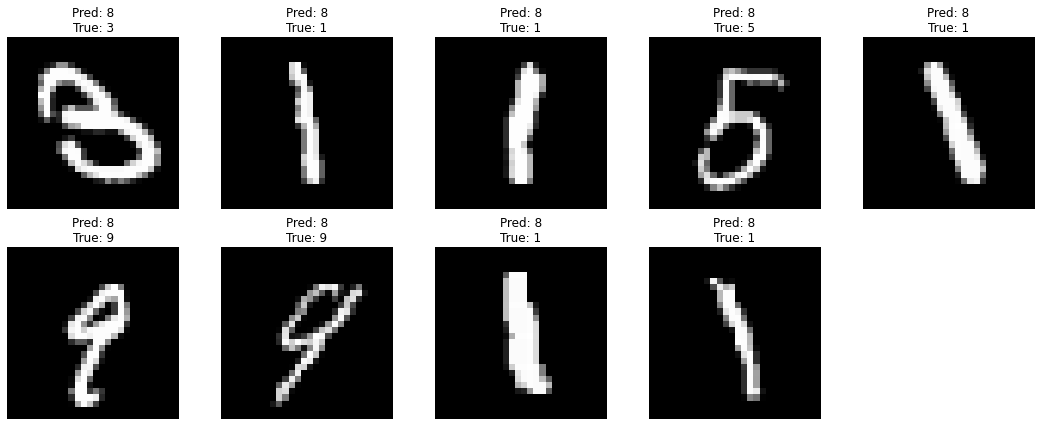

--------------chatGPT验证结束


In [19]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint = torch.load('./model/mnist_complex_net_checkpoint_epoch5.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载测试数据
test_size = 100
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)

# 获取一个批次的数据
data, target = next(iter(test_loader))

# 将数据输入模型进行推理
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)
model.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)

# 计算推理错误的个数并记录错误的行列位置
incorrect_indices = (pred.cpu() != target.view_as(pred)).nonzero(as_tuple=True)[0]

# 显示推理错误的个数
print(f'推理错误的个数: {len(incorrect_indices)} / {test_size}')

# 限制只显示前20个错误的图像
num_errors_to_display = min(40, len(incorrect_indices))

# 设置显示错误样本的网格
rows = (num_errors_to_display // 5) + (1 if num_errors_to_display % 5 != 0 else 0)
fig_error, axs_error = plt.subplots(rows, 5, figsize=(15, 3 * rows))
axs_error = axs_error.flatten()

for idx in range(num_errors_to_display):
    error_idx = incorrect_indices[idx]
    axs_error[idx].imshow(data[error_idx].cpu().numpy().squeeze(), cmap='gray')
    axs_error[idx].set_title(f'Pred: {pred[error_idx].item()}\nTrue: {target[error_idx].item()}')
    axs_error[idx].axis('off')

for ax in axs_error[num_errors_to_display:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

print('--------------chatGPT验证结束')

发现只显示了24个图像，因为在前100个图像中只有24个错误，由于上面的程序段有限制前100个条件，“将程序修改为输出前40个错误图像。”这个prompt就不够明确。
如果将prompt改为“搜索前40个错误图像并显示”，给出程序如下。

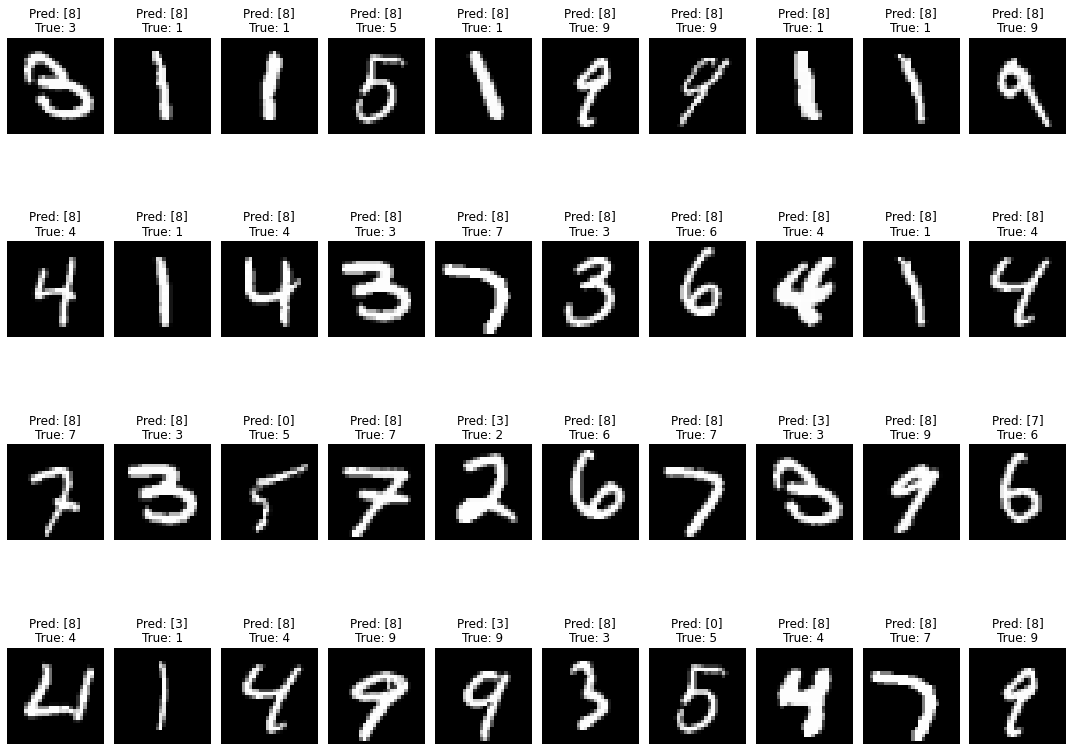

--------------chatGPT2次修改验证结束


In [20]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint = torch.load('./model/mnist_complex_net_checkpoint_epoch5.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载测试数据
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 用于存储错误图像的索引和对应的目标
incorrect_indices = []
incorrect_predictions = []

# 遍历整个测试集，寻找错误的预测
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    
    # 找到错误的预测
    incorrect = (pred != target.view_as(pred)).nonzero(as_tuple=True)[0]
    
    # 将错误的索引和对应的预测添加到列表中
    incorrect_indices.extend(incorrect.tolist())
    incorrect_predictions.extend(pred[incorrect].tolist())
    
    # 如果找到40个错误图像，则停止搜索
    if len(incorrect_indices) >= 40:
        break

# 限制只显示前40个错误的图像
num_errors_to_display = min(40, len(incorrect_indices))

# 设置显示错误样本的网格
rows = (num_errors_to_display // 10) + (1 if num_errors_to_display % 10 != 0 else 0)
fig_error, axs_error = plt.subplots(rows, 10, figsize=(15, 3 * rows))
axs_error = axs_error.flatten()

# 显示错误图像
for idx in range(num_errors_to_display):
    error_idx = incorrect_indices[idx]
    axs_error[idx].imshow(test_dataset[error_idx][0].numpy().squeeze(), cmap='gray')
    axs_error[idx].set_title(f'Pred: {incorrect_predictions[idx]}\nTrue: {test_dataset[error_idx][1]}')
    axs_error[idx].axis('off')

for ax in axs_error[num_errors_to_display:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

print('--------------chatGPT2次修改验证结束')